In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet

In [2]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")
df = X_train



In [3]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='ProfileReport.html')

In [4]:
print(df.head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
X_train.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
X_test.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df = X_train

In [8]:
nan_values = df.isna()
count_of_nan_values = nan_values.sum().sum()
print(count_of_nan_values)

868


In [9]:
nan_columns = df.columns[df.isna().sum() > 0]
float_columns = df.columns[df.dtypes == "float"] 
int_columns = df.columns[df.dtypes == "int64"] 

In [10]:
empty_float_columns=[]
empty_obj_columns=[]
empty_int_columns=[]

for i in nan_columns:
    if i in float_columns:
        empty_float_columns.append(i)
#    elif i in int_columns:
#        empty_int_columns.append(i)
    else:
        empty_obj_columns.append(i)

In [11]:
for i in empty_float_columns:
    df[f"{i}"].fillna(df[f"{i}"].mean(),inplace= True)
    X_test[f"{i}"].fillna(X_test[f"{i}"].mean(),inplace= True)
for i in empty_obj_columns:
    df.drop(f"{i}",axis=1, inplace= True)
    X_test.drop(f"{i}",axis=1, inplace= True)

In [12]:
nan_values = df.isna()
count_of_nan_values = nan_values.sum().sum()
print(count_of_nan_values)

0


In [13]:
df.shape

(1460, 64)

c:\Users\Sisasoft\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

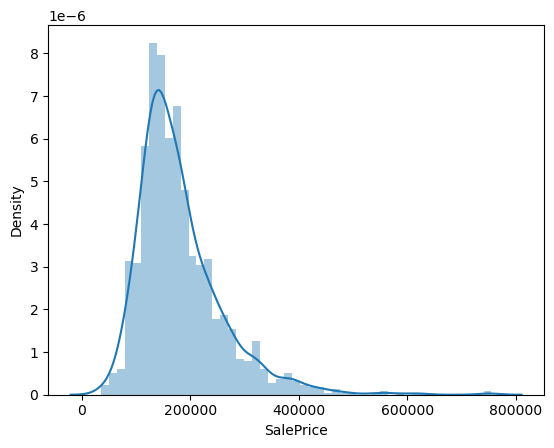

In [14]:
sns.distplot(df["SalePrice"])

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

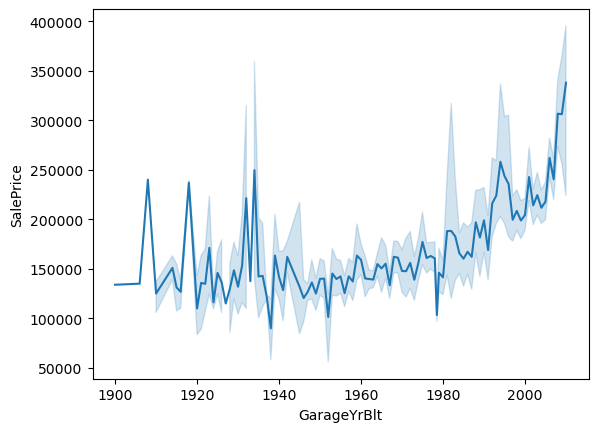

In [15]:
sns.lineplot(x= "GarageYrBlt",y= "SalePrice",data = df)

<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

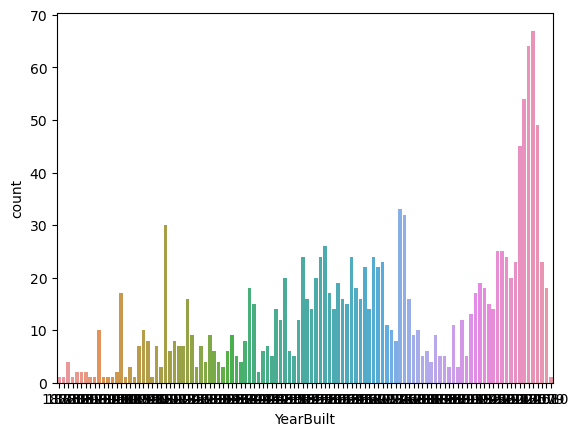

In [16]:
sns.countplot(x= "YearBuilt",data = df)

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

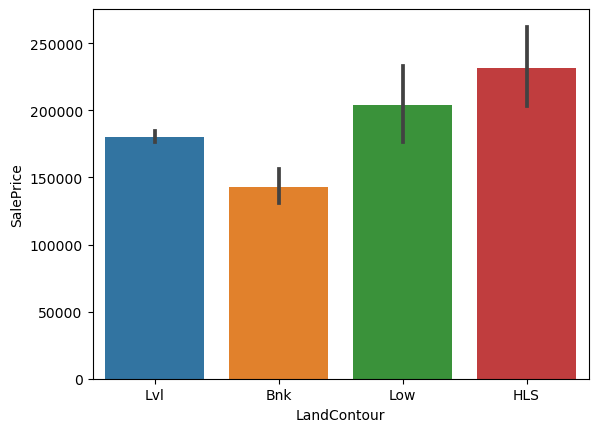

In [17]:
sns.barplot(x= "LandContour",y = "SalePrice",data = df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

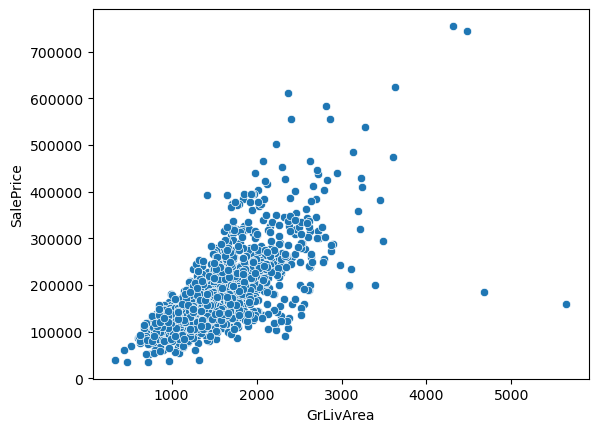

In [18]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

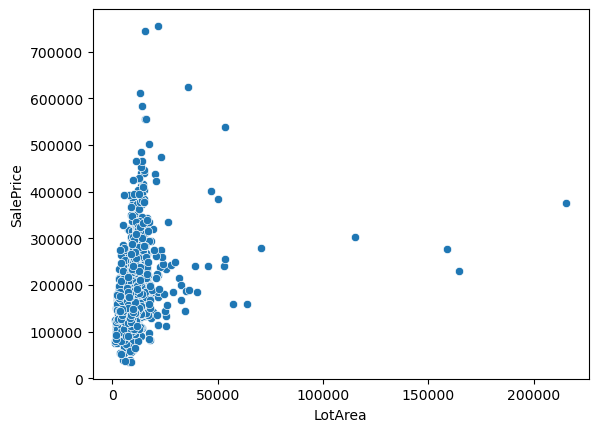

In [19]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

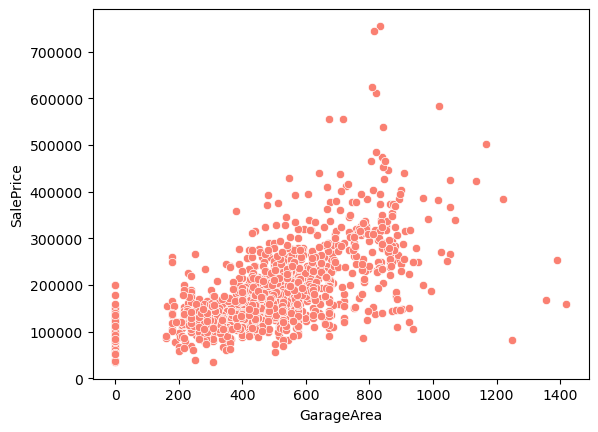

In [20]:
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", color = 'salmon')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

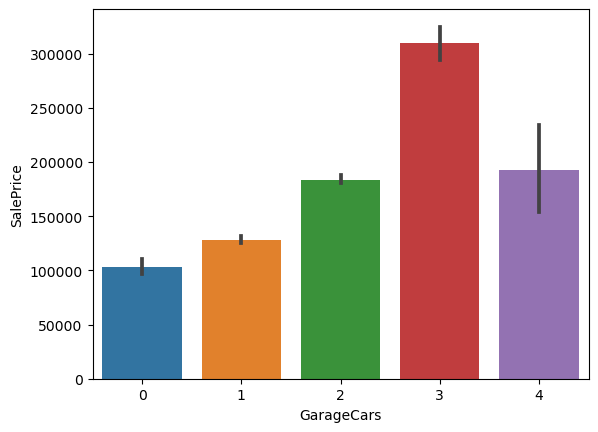

In [21]:
sns.barplot(x="GarageCars", y="SalePrice",data=df)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

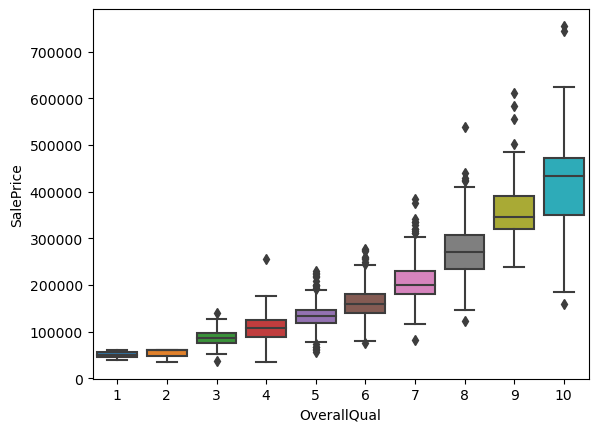

In [22]:
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

In [23]:
df.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [24]:
df_ninetynine_percent = df.sort_values("SalePrice",ascending=False).iloc[int(len(df)*0.01):]

c:\Users\Sisasoft\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

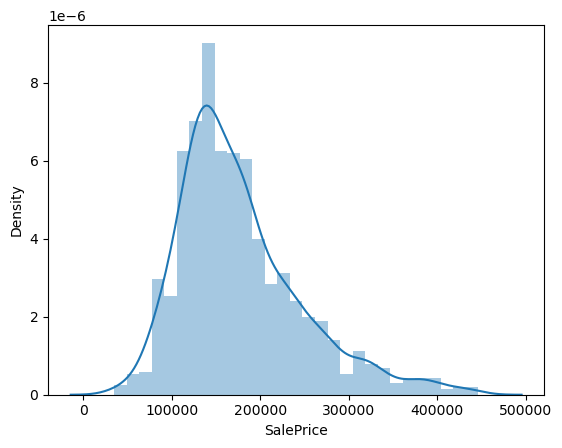

In [25]:
sns.distplot(df_ninetynine_percent["SalePrice"])

In [26]:
df_ninetynine_percent.groupby("YearBuilt").mean()["SalePrice"].sort_values()

YearBuilt
1927     82666.666667
1913     90350.000000
1875     94000.000000
1930    103588.888889
1924    105985.714286
            ...      
2007    255362.734694
1989    279500.000000
2008    302600.555556
1893    325000.000000
2010    394432.000000
Name: SalePrice, Length: 112, dtype: float64

In [27]:
df_ninetynine_percent = df_ninetynine_percent[df_ninetynine_percent.YearBuilt != 1893]
df_ninetynine_percent = df_ninetynine_percent[df_ninetynine_percent.YearBuilt != 1872]

In [28]:
df_ninetynine_percent = df_ninetynine_percent[df_ninetynine_percent["GrLivArea"] <= 4000]
df_ninetynine_percent = df_ninetynine_percent[(df_ninetynine_percent["GarageArea"] <= 1200) & (df_ninetynine_percent["GarageArea"] > 0)]
df_ninetynine_percent = df_ninetynine_percent[df_ninetynine_percent["LotArea"] <= 100000]

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

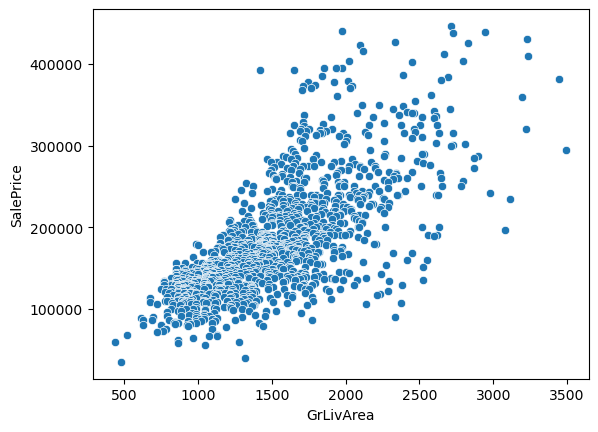

In [29]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_ninetynine_percent)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

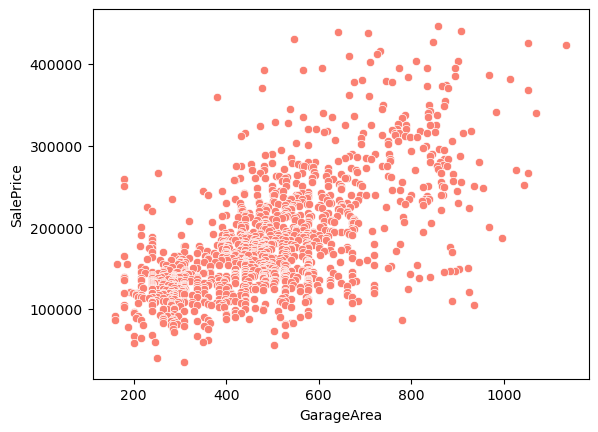

In [30]:
sns.scatterplot(data=df_ninetynine_percent, x="GarageArea", y="SalePrice", color = 'salmon')

In [31]:
pd.get_dummies(df_ninetynine_percent, columns= ["Condition1"],prefix=["Condition1"]).head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
527,60,RL,67.000000,14948,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,446261,0,0,1,0,0,0,0,0,0
473,20,RL,110.000000,14977,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,440000,0,0,1,0,0,0,0,0,0
58,60,RL,66.000000,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,...,438780,0,0,1,0,0,0,0,0,0
349,60,RL,56.000000,20431,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,437154,0,0,1,0,0,0,0,0,0
496,20,RL,70.049958,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,430000,0,0,1,0,0,0,0,0,0


In [32]:
pd.get_dummies(X_test, columns= ["Condition1"],prefix=["Condition1"])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,0,1,0,0,0,0,0,0,0
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Normal,0,0,1,0,0,0,0,0,0
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Normal,0,0,1,0,0,0,0,0,0
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Normal,0,0,1,0,0,0,0,0,0
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,Normal,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,0,0,1,0,0,0,0,0,0
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Abnorml,0,0,1,0,0,0,0,0,0
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Abnorml,0,0,1,0,0,0,0,0,0
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,0,0,1,0,0,0,0,0,0


In [33]:
for col in df_ninetynine_percent.columns:
    if df_ninetynine_percent[col].dtype == 'object':
        lbl = LabelEncoder()
        df_ninetynine_percent[col] = lbl.fit_transform(df_ninetynine_percent[col])
        X_test[col] = lbl.fit_transform(X_test[col])


In [34]:
X_train = df_ninetynine_percent.drop('SalePrice', axis=1)
y_train = df_ninetynine_percent['SalePrice']
X_test = X_test

In [36]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split



In [37]:
#XGBoost tahmin modeli 
regressor= XGBRegressor(eval_metric='rmsle',
                        n_estimators=100,
                        reg_lambda=1,
                        gamma=0,
                        max_depth=3)

In [38]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
predictions = regressor.predict(X_test)

In [40]:
#verilen örnek satış fiyatları üzerinden tahmin skoru 
solution = pd.read_csv("sample_submission.csv")
y_true = solution["SalePrice"]

RMSLE = np.sqrt( mean_squared_log_error(y_true, predictions))
print(f"Başarı Skoru {RMSLE :.5f} " )

Başarı Skoru 0.37768 


In [41]:
#model çıktılarında eğitilen verinin tahmin sonuçları 
output = pd.DataFrame({"Id": range(1461, 1461+len(X_test)), "SalePrice":predictions})
output.to_csv("submission1.csv", index=False)

In [42]:
#Fiyatları bilinen veri setinin bölüp eğitimin başarısını hesaplayalım
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_ninetynine_percent.drop('SalePrice', axis=1), df_ninetynine_percent['SalePrice'], test_size=0.33, random_state=42)

In [43]:
regressor.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
predictions = regressor.predict(X_test2)

In [45]:
RMSLE = np.sqrt( mean_squared_log_error(y_test2, predictions))
print(f"Başarı Skoru {RMSLE :.5f} " )

Başarı Skoru 0.12904 


In [46]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [47]:
#karar ağaçları tahmin modeli
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_ninetynine_percent.drop('SalePrice', axis=1), df_ninetynine_percent['SalePrice'], test_size=0.33, random_state=42)
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train3, y_train3)
predictions2 = dtc.predict(X_test3)
RMSLE = np.sqrt( mean_squared_log_error(y_test3, predictions2))
print(f"Başarı Skoru {RMSLE :.5f} " )

Başarı Skoru 0.24128 


In [48]:
from sklearn.ensemble import BaggingClassifier
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_ninetynine_percent.drop('SalePrice', axis=1), df_ninetynine_percent['SalePrice'], test_size=0.33, random_state=42)
bc = BaggingClassifier()
bc.fit(X_train4, y_train4)
predictions3 = bc.predict(X_test4)
RMSLE = np.sqrt( mean_squared_log_error(y_test4, predictions3))
print(f"Başarı Skoru {RMSLE :.5f} " )


Başarı Skoru 0.32630 


In [49]:
from sklearn.naive_bayes import GaussianNB
gnb =GaussianNB()
gnb.fit(X_train4, y_train4)
predictions4 = gnb.predict(X_test4)
RMSLE = np.sqrt( mean_squared_log_error(y_test4, predictions4))
print(f"Başarı Skoru {RMSLE :.5f} " )

Başarı Skoru 0.22275 
